## **Recognising handwritten Digits using Pytorch and google Colab** **bold text**

In [0]:
import torch; torch.manual_seed(0)
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np

download the dataset.

In [0]:
my_transforms = tv.transforms.Compose([
  tv.transforms.RandomRotation(5),
  tv.transforms.ToTensor(),
  tv.transforms.Normalize((0.1307,),(0.3081,))
]) 

train_dataset = tv.datasets.MNIST(
    './train',
    train=True,
    download=True,
    transform=my_transforms
)

val_dataset = tv.datasets.MNIST(
    './eval',
    train=False,
    download=True,
    transform=my_transforms
)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Preprocess and encapsulate the data into dataloaders.

In [0]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset, 
                                         batch_size=batch_size)

Visualize the data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


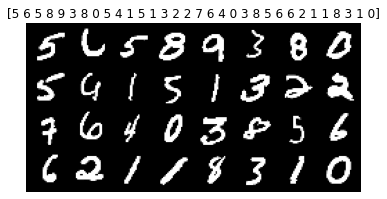

In [67]:
for images, labels in train_loader:
  grid = tv.utils.make_grid(images)
  plt.imshow(grid.numpy().transpose((1,2,0)))
  plt.title(labels.numpy())
  plt.axis('off')
  plt.show()
  
  break;

We define the model and the object function.

In [0]:
class DigitRecNet(torch.nn.Module):
  def __init__(self, hidden_size1, hidden_size2):
    super(DigitRecNet, self).__init__()
    self.linear1 = torch.nn.Linear(28 * 28, hidden_size1)
    self.relu1 = torch.nn.ReLU()
    self.linear2 = torch.nn.Linear(hidden_size1, hidden_size2)
    self.relu2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(hidden_size2, 10)
  
  def forward(self, x):
    out = self.linear1(x)
    out = self.relu1(out)
    out = self.linear2(out)
    out = self.relu2(out)
    out = self.output(out)

    return out

We then define the optimizer that we use to classify and our loss function.

In [0]:
n_epochs = 10
learning_rate = 0.001

model = DigitRecNet(128,128)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = torch.nn.CrossEntropyLoss()

Enabling The GPU in Colab

In [71]:
if torch.cuda.is_available():
  print('cuda is avialable start using gpu')
  device = torch.device('cuda')
else:
  print('cuda isn\'t avialable start using cpu')
  device = torch.device('cpu')

cuda is avialable start using gpu


Start training and evaluating!

In [72]:
model = model.to(device)
losses = []

for epoch in range(n_epochs):
  running_loss = 0
    
  for images, labels in train_loader:
    images = images.reshape(-1, 28 * 28).to(device)
    labels = labels.to(device)
        
    output = model(images)
    loss = criterion(output, labels)
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    running_loss += loss.item() * images.size(0)
    
  losses.append(running_loss / len(train_loader))
  print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')


Epoch 1/10: 61.1092
Epoch 2/10: 26.1410
Epoch 3/10: 16.1683
Epoch 4/10: 13.2965
Epoch 5/10: 11.8932
Epoch 6/10: 11.0152
Epoch 7/10: 10.3648
Epoch 8/10: 9.8287
Epoch 9/10: 9.4155
Epoch 10/10: 9.0171


Loss as a function of epochs

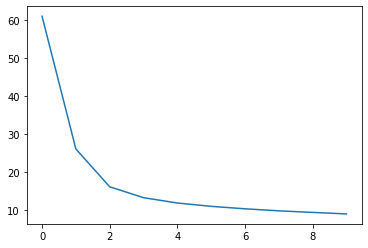

In [73]:
plt.plot(losses)
plt.show()

Now we need to test our data

In [74]:
with torch.no_grad(): #After we finshed training we don't update the grad anymore
    correct_preds = 0
    total_preds = 0
    for images, labels in val_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        output = model(images)
        _, preds = torch.max(output.data, 1)
        
        total_preds += labels.size(0)
        correct_preds += (preds == labels).sum().item()
    
    print(f'Accuracy: {100 * correct_preds / total_preds}%')

Accuracy: 92.39%


Visualize some predictions

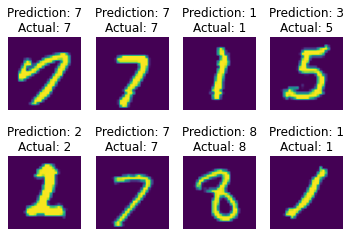

In [76]:
import random

n_images = 8

with torch.no_grad():
    for i in range(n_images):
        plt.subplot(2, n_images // 2, i + 1)
        index = random.randint(0, total_preds - 1)
        img, label = val_dataset[index]
        
        temp_img = img.reshape(-1, 28 * 28).to(device)
        output = model(temp_img)
        _, pred = torch.max(output.data, 1)
        
        plt.imshow(img.squeeze(0).numpy())
        plt.title(f'Prediction: {pred.item()}\nActual: {label}')
        plt.axis('off')
    
    plt.show()

We could improve our module by adding more data to our dataset or improving our loss-function / learining rate and other more factors.